In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

In [103]:
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings(action="ignore"):
    fxn()

In [16]:
cust_data = pd.read_csv('dataset/customer_data.csv')

pymt_data = pd.read_csv('dataset/payment_data.csv')

In [17]:
cust_data.shape

(1125, 13)

In [18]:
cust_data.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [19]:
pymt_data.shape

(8250, 12)

In [20]:
pymt_data.head()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016


In [22]:
cust_data = cust_data.set_index("id")
pymt_data = pymt_data.set_index("id")

df = cust_data.join(pymt_data)

In [23]:
df.shape

(8250, 23)

In [24]:
df.head()

,label,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
id,,,,,,,,,,,,,,,,,,,,,
54982665,1,5,1245.5,3,77000.0,2,15,5,109,5,...,0,0,0,9,10,60500.0,31/01/2015,6657.6,18934.0,19/09/2015
54982665,1,5,1245.5,3,77000.0,2,15,5,109,5,...,0,0,0,18,10,NaN,28/04/2009,153792.0,149387.0,10/08/2015
54982665,1,5,1245.5,3,77000.0,2,15,5,109,5,...,0,0,0,1,5,NaN,30/03/2009,0.0,150500.0,NaN
54982665,1,5,1245.5,3,77000.0,2,15,5,109,5,...,2,26,11906,6,10,NaN,17/05/2007,0.0,46371.0,12/07/2013
59004779,0,4,1277.0,1,113000.0,2,8,-1,100,3,...,0,0,0,4,6,NaN,02/06/2016,15120.0,21500.0,19/04/2016


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8250 entries, 54982665 to 54989781
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   label            8250 non-null   int64  
 1   fea_1            8250 non-null   int64  
 2   fea_2            7222 non-null   float64
 3   fea_3            8250 non-null   int64  
 4   fea_4            8250 non-null   float64
 5   fea_5            8250 non-null   int64  
 6   fea_6            8250 non-null   int64  
 7   fea_7            8250 non-null   int64  
 8   fea_8            8250 non-null   int64  
 9   fea_9            8250 non-null   int64  
 10  fea_10           8250 non-null   int64  
 11  fea_11           8250 non-null   float64
 12  OVD_t1           8250 non-null   int64  
 13  OVD_t2           8250 non-null   int64  
 14  OVD_t3           8250 non-null   int64  
 15  OVD_sum          8250 non-null   int64  
 16  pay_normal       8250 non-null   int64  
 17  prod_cod

In [27]:
df.describe().round()

,label,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,...,fea_11,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance
count,8250.0,8250.0,7222.0,8250.0,8250.0,8250.0,8250.0,8250.0,8250.0,8250.0,...,8250.0,8250.0,8250.0,8250.0,8250.0,8250.0,8250.0,2132.0,8250.0,7841.0
mean,0.0,6.0,1286.0,2.0,138671.0,2.0,11.0,5.0,100.0,4.0,...,153.0,0.0,0.0,0.0,188.0,15.0,8.0,85790.0,105404.0,219203.0
std,0.0,1.0,52.0,1.0,108157.0,0.0,3.0,3.0,13.0,1.0,...,122.0,1.0,1.0,3.0,1804.0,12.0,4.0,74346.0,1887704.0,2814536.0
min,0.0,1.0,1116.0,1.0,15000.0,1.0,3.0,-1.0,64.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-40303.0,501.0
25%,0.0,4.0,1248.0,1.0,77000.0,2.0,8.0,5.0,90.0,3.0,...,1.0,0.0,0.0,0.0,0.0,4.0,6.0,37400.0,0.0,23453.0
50%,0.0,5.0,1283.0,3.0,111000.0,2.0,11.0,5.0,105.0,5.0,...,185.0,0.0,0.0,0.0,0.0,11.0,10.0,68200.0,0.0,44047.0
75%,0.0,7.0,1318.0,3.0,151000.0,2.0,12.0,5.0,110.0,5.0,...,220.0,0.0,0.0,0.0,0.0,25.0,10.0,112200.0,24948.0,100500.0
max,1.0,7.0,1481.0,3.0,1200000.0,2.0,16.0,10.0,115.0,5.0,...,707.0,34.0,34.0,35.0,31500.0,36.0,27.0,660000.0,163211958.0,180000500.0


In [ ]:
df.drop(["prod_limit", "report_date", "update_date"], axis = 1, inplace = True)

<Axes: xlabel='label', ylabel='count'>

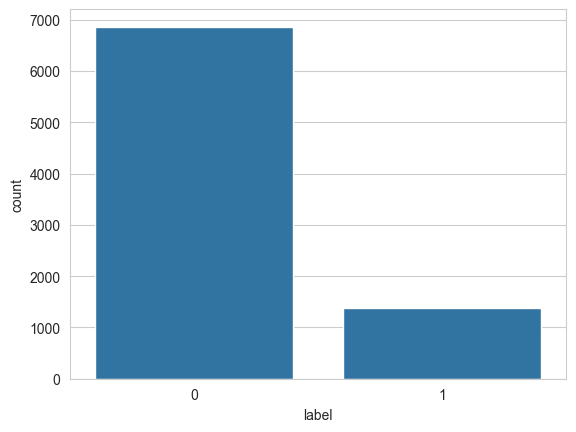

In [56]:
sns.set_style("whitegrid")
sns.countplot(x = "label", data = df)

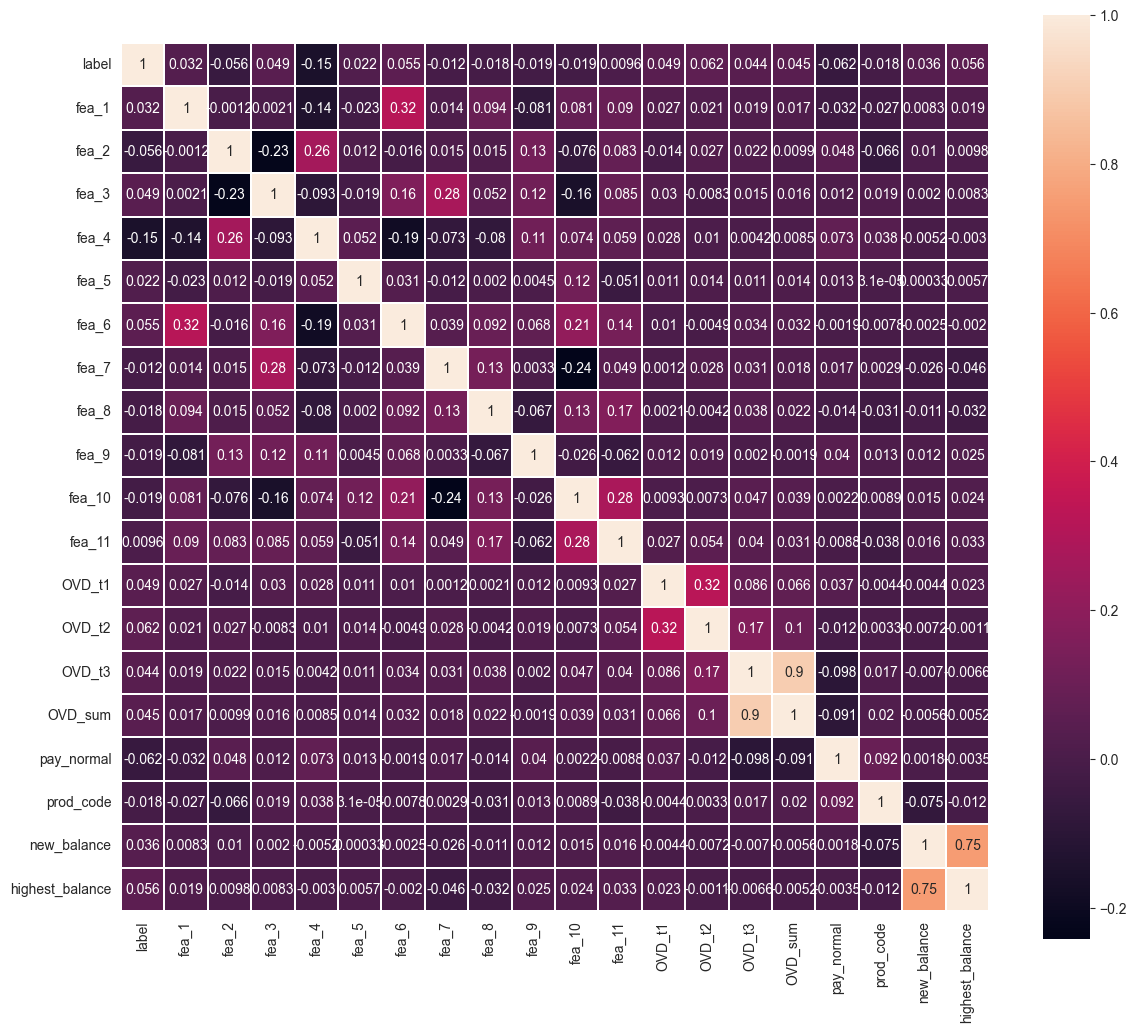

In [60]:
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [61]:
from sklearn.impute import SimpleImputer

imputer =  SimpleImputer(strategy="median")
df= pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   label            8250 non-null   float64
 1   fea_1            8250 non-null   float64
 2   fea_2            8250 non-null   float64
 3   fea_3            8250 non-null   float64
 4   fea_4            8250 non-null   float64
 5   fea_5            8250 non-null   float64
 6   fea_6            8250 non-null   float64
 7   fea_7            8250 non-null   float64
 8   fea_8            8250 non-null   float64
 9   fea_9            8250 non-null   float64
 10  fea_10           8250 non-null   float64
 11  fea_11           8250 non-null   float64
 12  OVD_t1           8250 non-null   float64
 13  OVD_t2           8250 non-null   float64
 14  OVD_t3           8250 non-null   float64
 15  OVD_sum          8250 non-null   float64
 16  pay_normal       8250 non-null   float64
 17  prod_code     

In [92]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [93]:
X = df.drop("label",axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=27)

In [94]:
y_train.value_counts()

label
0.0    5485
1.0    1115
Name: count, dtype: int64

In [95]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority",random_state=27)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled,y_train)

In [97]:
y_train_sm.value_counts()

label
0.0    5485
1.0    5485
Name: count, dtype: int64

In [112]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2']
}

logreg = LogisticRegression()

logreg = GridSearchCV(logreg, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
logreg.fit(X_train_sm, y_train_sm)

print(f'Best parameters: {logreg.best_params_}')


Best parameters: {'C': 1, 'penalty': 'l2'}


In [117]:
y_pred = logreg.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(f"Confusion Matrix:\n {confusion_matrix(y_test,y_pred,)}""\n")

              precision    recall  f1-score   support

         0.0       0.90      0.58      0.70      1378
         1.0       0.24      0.67      0.35       272

    accuracy                           0.59      1650
   macro avg       0.57      0.63      0.53      1650
weighted avg       0.79      0.59      0.65      1650

Confusion Matrix:
 [[798 580]
 [ 89 183]]

